<a href="https://colab.research.google.com/github/VijayS-001/Emotion-Based-Music-Recommendation-Chatbot--with-YouTube-Integration/blob/main/Chatbot_Emotion_PlayList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chatbot with Songs

In [1]:
#Importing the libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
intents = {
    "intents": [

        # English moods
        {"tag": "english_happy", "patterns": ["I am happy", "Feeling good", "I am excited", "joy", "smile"],
         "responses": [
             "Song: Happy – Pharrell Williams",
             "Song: Can't Stop the Feeling – Justin Timberlake",
             "Song: Uptown Funk – Bruno Mars",
             "Song: Best Day of My Life – American Authors",
             "Song: Good Life – OneRepublic"
         ]},

        {"tag": "english_sad", "patterns": ["I am sad", "Feeling down", "unhappy", "cry", "lonely"],
         "responses": [
             "Song: Someone Like You – Adele",
             "Song: Fix You – Coldplay",
             "Song: Let Her Go – Passenger",
             "Song: Stay With Me – Sam Smith",
             "Song: When I Was Your Man – Bruno Mars"
         ]},

        {"tag": "english_motivated", "patterns": ["I need motivation", "push me", "inspire me", "motivate", "energy"],
         "responses": [
             "Song: Eye of the Tiger – Survivor",
             "Song: Hall of Fame – The Script",
             "Song: Stronger – Kanye West",
             "Song: Believer – Imagine Dragons",
             "Song: Don't Stop Believin' – Journey"
         ]},

        {"tag": "english_romantic", "patterns": ["I am in love", "romantic mood", "date night", "I like someone"],
         "responses": [
             "Song: Perfect – Ed Sheeran",
             "Song: All of Me – John Legend",
             "Song: Thinking Out Loud – Ed Sheeran",
             "Song: Just the Way You Are – Bruno Mars",
             "Song: Tum Hi Ho – Arijit Singh"
         ]},

        {"tag": "english_party", "patterns": ["Let's party", "Play party songs", "dance music", "club songs"],
         "responses": [
             "Song: Uptown Funk – Bruno Mars",
             "Song: Despacito – Luis Fonsi",
             "Song: Lean On – Major Lazer",
             "Song: On The Floor – Jennifer Lopez",
             "Song: Party Rock Anthem – LMFAO"
         ]},

        {"tag": "english_relax", "patterns": ["I want to relax", "calm music", "chill songs", "peaceful mood"],
         "responses": [
             "Song: Weightless – Marconi Union",
             "Song: Let Her Go – Passenger",
             "Song: Yellow – Coldplay",
             "Song: Ocean Eyes – Billie Eilish",
             "Song: Perfect – Ed Sheeran"
         ]},

        # Tamil mood
        {"tag": "tamil_happy", "patterns": ["Happy Tamil song", "Tamil feel good music", "Tamil cheerful songs"],
         "responses": [
             "Song: Vaathi Coming – Anirudh (Master)",
             "Song: Arabic Kuthu – Anirudh (Beast)",
             "Song: Jalabulajangu – Anirudh (Don)",
             "Song: Jimikki Ponnu – Anirudh (Varisu)",
             "Song: So Baby – Anirudh (Doctor)"
         ]},

        {"tag": "tamil_sad", "patterns": ["Sad Tamil song", "Heartbreak Tamil music", "Tamil emotional songs"],
         "responses": [
             "Song: Ennodu Nee Irundhaal – A.R. Rahman (I)",
             "Song: Thalli Pogathey – A.R. Rahman (Achcham Yenbadhu Madamaiyada)",
             "Song: Yaanji – Anirudh (Vikram Vedha)",
             "Song: Nenjukkul Peidhidum – Harris Jayaraj (Vaaranam Aayiram)",
             "Song: Pudhu Metro Rail – Santhosh Narayanan (Kadhalum Kadandhu Pogum)"
         ]},

        {"tag": "tamil_love", "patterns": ["Romantic Tamil song", "Love Tamil music", "Tamil couple songs"],
         "responses": [
             "Song: Kanmani Anbodu – Ilaiyaraaja (Guna)",
             "Song: Vaseegara – Bombay Jayashree (Minnale)",
             "Song: Munbe Vaa – Shreya Ghoshal (Sillunu Oru Kaadhal)",
             "Song: Vinnaithaandi Varuvaayaa – A.R. Rahman",
             "Song: Ennavale Adi Ennavale – A.R. Rahman (Kadhalan)"
         ]},

        {"tag": "tamil_party", "patterns": ["Party Tamil song", "Dance Tamil music", "Tamil club songs"],
         "responses": [
             "Song: Aaluma Doluma – Anirudh (Vedalam)",
             "Song: Sodakku – Anirudh (Thaanaa Serndha Koottam)",
             "Song: Local Boys – Anirudh (Ethir Neechal)",
             "Song: Oh Penne – Anirudh (Vanakkam Chennai)",
             "Song: Don’u Don’u Don’u – Anirudh (Maari)"
         ]},

        # TELUGU mood
        {"tag": "telugu_happy", "patterns": ["Happy Telugu song", "Telugu cheerful music", "Telugu feel good songs"],
         "responses": [
             "Song: Butta Bomma – Armaan Malik (Ala Vaikunthapurramuloo)",
             "Song: Ramuloo Ramulaa – (Ala Vaikunthapurramuloo)",
             "Song: Mind Block – (Sarileru Neekevvaru)",
             "Song: Jai Balayya – (Akhanda)",
             "Song: Ammaye Sannaga – (Shyam Singha Roy)"
         ]},

        {"tag": "telugu_sad", "patterns": ["Sad Telugu song", "Heartbreak Telugu music", "Telugu emotional songs"],
         "responses": [
             "Song: Samajavaragamana – (Ala Vaikunthapurramuloo)",
             "Song: Inkem Inkem Inkem Kaavaale – (Geetha Govindam)",
             "Song: Ee Manase Se Se – (Tholi Prema)",
             "Song: Priyathama Neevachata Kushalama – (Jalsa)",
             "Song: Kadhile Kaalam Kalala – (Fidaa)"
         ]},

        {"tag": "telugu_love", "patterns": ["Romantic Telugu song", "Love Telugu music", "Telugu couple songs"],
         "responses": [
             "Song: Choosi Chudangane – (Chalo)",
             "Song: Ye Chota Nuvvunna – (Ala Vaikunthapurramuloo)",
             "Song: Nuvvunte Naa Jathaga – (Yevade Subramanyam)",
             "Song: Kanulanu Thaake – (Manam)",
             "Song: Vintunnava – (Ye Maaya Chesave)"
         ]},

        {"tag": "telugu_party", "patterns": ["Party Telugu song", "Dance Telugu music", "Telugu club songs"],
         "responses": [
             "Song: Swing Zara – (Jai Lava Kusa)",
             "Song: Seeti Maar – (DJ Duvvada Jagannadham)",
             "Song: Top Lesi Poddi – (Iddarammayilatho)",
             "Song: Blockbuster – (Sarrainodu)",
             "Song: Ammadu Let’s Do Kummudu – (Khaidi No. 150)"
         ]}
    ]
}


In [4]:
#importing the dataset
# data = intents
print("Using intent data from the 'intents' variable.")

Using intent data from the 'intents' variable.


In [5]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in intents['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [6]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})


In [7]:
#Dataframe
data

,inputs,tags
0,I am happy,english_happy
1,Feeling good,english_happy
2,I am excited,english_happy
3,joy,english_happy
4,smile,english_happy
5,I am sad,english_sad
6,Feeling down,english_sad
7,unhappy,english_sad
8,cry,english_sad
9,lonely,english_sad


#Pre-processing

In [8]:
#remoing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))

In [9]:
data

,inputs,tags
0,i am happy,english_happy
1,feeling good,english_happy
2,i am excited,english_happy
3,joy,english_happy
4,smile,english_happy
5,i am sad,english_sad
6,feeling down,english_sad
7,unhappy,english_sad
8,cry,english_sad
9,lonely,english_sad


In [10]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

In [11]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [12]:
input_shape = x_train.shape[1]
print(input_shape)

4


In [13]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  49
output length :  14


#Creating the Model

In [14]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [15]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
#Training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0600 - loss: 2.6385
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0862 - loss: 2.6374
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0993 - loss: 2.6362
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1228 - loss: 2.6348
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1201 - loss: 2.6335
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0993 - loss: 2.6333
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1201 - loss: 2.6316
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1070 - loss: 2.6304
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1070 - loss: 2.6291
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1070 - loss: 2.6273
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1070 - loss: 2.6255
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1070 - lo

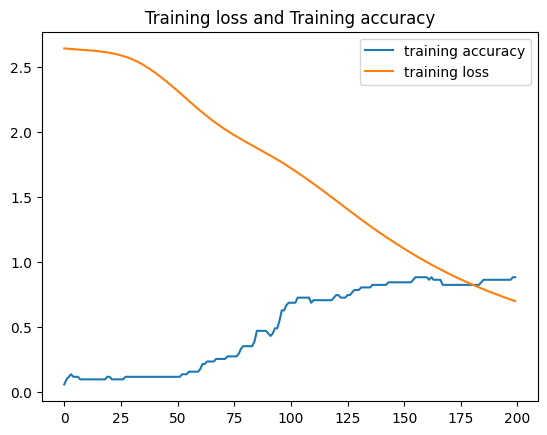

In [17]:
#Plotting model accuracy
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],label='training accuracy')
plt.plot(train.history['loss'],label='training loss')
plt.title('Training loss and Training accuracy')
plt.legend()
plt.show()

#Chatbot working on Songs-Youtube Redirects as given
Emotions Search - Happy, Sad, Love, Dance/party.

In [36]:
import string

# ================== SONG LINKS DATASET ==================
song_links = {
    # ===== ENGLISH =====
    "Happy – Pharrell Williams": "https://www.youtube.com/watch?v=ZbZSe6N_BXs",
    "Can't Stop the Feeling – Justin Timberlake": "https://www.youtube.com/watch?v=ru0K8uYEZWw",
    "Uptown Funk – Bruno Mars": "https://www.youtube.com/watch?v=OPf0YbXqDm0",
    "Best Day of My Life – American Authors": "https://www.youtube.com/watch?v=Y66j_BUCBMY",
    "Good Life – OneRepublic": "https://www.youtube.com/watch?v=jZhQOvvV45w",

    "Someone Like You – Adele": "https://www.youtube.com/watch?v=hLQl3WQQoQ0",
    "Fix You – Coldplay": "https://www.youtube.com/watch?v=k4V3Mo61fJM",
    "Let Her Go – Passenger": "https://www.youtube.com/watch?v=RBumgq5yVrA",
    "Stay With Me – Sam Smith": "https://www.youtube.com/watch?v=pB-5XG-DbAA",
    "When I Was Your Man – Bruno Mars": "https://www.youtube.com/watch?v=ekzHIouo8Q4",

    "Perfect – Ed Sheeran": "https://www.youtube.com/watch?v=2Vv-BfVoq4g",
    "All of Me – John Legend": "https://www.youtube.com/watch?v=450p7goxZqg",
    "Love Story – Taylor Swift": "https://www.youtube.com/watch?v=8xg3vE8Ie_E",

    "Stronger – Kanye West": "https://www.youtube.com/watch?v=PsO6ZnUZI0g",
    "Fight Song – Rachel Platten": "https://www.youtube.com/watch?v=xo1VInw-SKc",
    "Hall of Fame – The Script": "https://www.youtube.com/watch?v=mk48xRzuNvA",

    "Party Rock Anthem – LMFAO": "https://www.youtube.com/watch?v=KQ6zr6kCPj8",
    "Cheap Thrills – Sia": "https://www.youtube.com/watch?v=nYh-n7EOtMA",
    "Shake It Off – Taylor Swift": "https://www.youtube.com/watch?v=nfWlot6h_JM",

    # ===== TAMIL =====
    "Vaathi Coming – Anirudh (Master)": "https://www.youtube.com/watch?v=fRD_3vJagxk",
    "Arabic Kuthu – Anirudh (Beast)": "https://www.youtube.com/watch?v=KUN5Uf9mObQ",
    "Jalabulajangu – Anirudh (Don)": "https://www.youtube.com/watch?v=6KzeuDstzOY",
    "Jimikki Ponnu – Anirudh (Varisu)": "https://www.youtube.com/watch?v=HfMTwkVQohM",
    "So Baby – Anirudh (Doctor)": "https://www.youtube.com/watch?v=UgjtxhV08Ao",

    "Munbe Vaa – Rahman (Sillunu Oru Kaadhal)": "https://youtu.be/rp3_FhRnIRw?si=rRh0w-j_n-AOcmjV",
    "Idhazhin Oram-3": "https://youtu.be/lZORMUufA_Y?si=Lgi53Jj7U11W7e4O",
    "Pottala Muttaye-Thalivan Thalaivii": "https://youtu.be/zVjVqKoS9QU?si=Uv3pq1jZa1nXdgmA",

    "Boom Boom": "https://youtu.be/5JoPeWHkKJg?si=aYDhe_DJYCaoIwHa",
    "Monica – Coolie": "https://youtu.be/2qCpY38ompo?si=2BFyg5Zg7OYZ9cUj",

    "Selfie pulla-Katthi": "https://youtu.be/xZ92nnR1Pt8?si=Td_p6RyVtdFkRWTg",
    "Aaluma Doluma – Vedalam": "https://youtu.be/2ogKpj5QuSY?si=s5lT2J8kMiPAnAea",

    # ===== TELUGU =====
    "Butta Bomma – Armaan Malik (Ala Vaikunthapurramuloo)": "https://www.youtube.com/watch?v=2mDCVzruYzQ",
    "Ramuloo Ramulaa – (Ala Vaikunthapurramuloo)": "https://www.youtube.com/watch?v=Bg8Yb9zGYyA",
    "Mind Block – (Sarileru Neekevvaru)": "https://www.youtube.com/watch?v=J7Qf8bQRPuc",
    "Jai Balayya – (Veera Simha Reddy)": "https://www.youtube.com/watch?v=VgcxZS_R1mg",

    "Samajavaragamana – Sid Sriram": "https://youtu.be/OCg6BWlAXSw?si=oHE-JASXBcZymes0",
    "Inkem Inkem – Geetha Govindam": "https://youtu.be/LPeZOE8ZIHI?si=eub2v5lhcBxNCsnf",
    "Kanulanu Thaake – Manam": "https://youtu.be/30Bjg_7KuoE?si=LtIbtcdAdQtOjfoF",

    "emai poyave – Padi Padi leche Manasu": "https://youtu.be/Eyx0Hvi1_Ng?si=spWONVVmGco2Pyt7",
    "Oke Oka Jeevitham – Aditya": "https://youtu.be/ftbK-3hF_HA?si=L5aax7ofsvXv9oXs",

    "Top Lesi Poddi – Iddarammayilatho": "https://youtu.be/YAscOYMTgTs?si=JXGql1e3DutYsTIL",
    "Seeti Maar – DJ": "https://youtu.be/F5X694sak5U?si=6K5iQflag8YSplI4",

    #=======HINDI =====
    "Bad Newz-Tauba Tauba": "https://youtu.be/LK7-_dgAVQE?si=-V3o196KlZvCsJto",
    "Badtameez Dil-Yeh Jawaani Hai Deewani": "https://youtu.be/II2EO3Nw4m0?si=3wecH8CF2G83c4S4",
    "2 States-Locha E Ulfat": "https://youtu.be/G6RR2_NQ530?si=uLiyjlBwKPDjY8lj",
    "Illahi - Yeh Jawaani Hai Deewani": "https://youtu.be/6w67NOaRe-w?si=gwc71_bI8PjuOwHu",
    "Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya": "https://youtu.be/qpIdoaaPa6U?si=HSxWizJG-dMiD_3k",
    "KHAIRIYAT-Chhichhore":"https://youtu.be/9pIXNy-pS10?si=0avLyaIXgRXkn_7t",
    "JAB TAK-M.S. DHONI -THE UNTOLD STORY":"https://youtu.be/K-Ts-NFR62o?si=PaB1_sa1debROKc7",
    "Channa Mereya - Ae Dil Hai Mushkil": "https://youtu.be/z-diRlyLGzo?si=RfmNlKNrlQ1uK1Mw",
    "Bhula Dena Mujhe-Aashiqui 2": "https://youtu.be/II4CvWvgIsI?si=XgAb-vKxVRuLLenQ",
    "Piya O Re Piya-Tere Naal Love Ho Gaya": "https://youtu.be/Fm23HC3Rcac?si=Ze3pQXOxfKF_WBoH",
    "Sun Saathiya-ABCD 2": "https://youtu.be/TGpG56pg3UU?si=X3qa0_hwsXBH_DB1",
    "Kala Chashma-Baar Baar Dekho":"https://youtu.be/k4yXQkG2s1E?si=3JJzDF5ZWw0L-_B-",
    " Muqabla-Street Dancer 3D":"https://youtu.be/l75z7FrYRXI?si=f_7OmHU5d4lLMsfU"


}

# ================== FIXED RESPONSES ==================
responses = {
    "english_happy": ["Happy – Pharrell Williams", "Can't Stop the Feeling – Justin Timberlake",
                      "Uptown Funk – Bruno Mars", "Best Day of My Life – American Authors", "Good Life – OneRepublic"],
    "english_sad": ["Someone Like You – Adele", "Fix You – Coldplay", "Let Her Go – Passenger",
                    "Stay With Me – Sam Smith", "When I Was Your Man – Bruno Mars"],
    "english_love": ["Perfect – Ed Sheeran", "All of Me – John Legend", "Love Story – Taylor Swift"],
    "english_motivation": ["Stronger – Kanye West", "Fight Song – Rachel Platten", "Hall of Fame – The Script"],
    "english_dance": ["Party Rock Anthem – LMFAO", "Cheap Thrills – Sia", "Shake It Off – Taylor Swift"],

    "tamil_happy": ["Vaathi Coming – Anirudh (Master)", "Arabic Kuthu – Anirudh (Beast)", "Jalabulajangu – Anirudh (Don)",
                    "Jimikki Ponnu – Anirudh (Varisu)", "So Baby – Anirudh (Doctor)"],
    "tamil_love": ["Munbe Vaa – Rahman (Sillunu Oru Kaadhal)", "Idhazhin Oram-3",
                   "Pottala Muttaye-Thalivan Thalaivii"],
    "tamil_dance": ["Monica – Coolie","Boom Boom- Dude","Selfie pulla-Katthi", "Aaluma Doluma – Vedalam"],

    "telugu_happy": ["Butta Bomma – Armaan Malik (Ala Vaikunthapurramuloo)", "Ramuloo Ramulaa – (Ala Vaikunthapurramuloo)",
                     "Mind Block – (Sarileru Neekevvaru)", "Jai Balayya – (Veera Simha Reddy)"],
    "telugu_love": ["Samajavaragamana – Sid Sriram", "Inkem Inkem – Geetha Govindam", "Kanulanu Thaake – Manam"],
    "telugu_sad": ["emai poyave – Padi Padi leche Manasu", "Oke Oka Jeevitham – Aditya"],
    "telugu_dance": ["Top Lesi Poddi – Iddarammayilatho", "Seeti Maar – DJ"],

    "hindi_happy":["Bad Newz-Tauba Tauba","Yeh Jawaani Hai Deewani-Badtameez Dil ","2 States-Locha E Ulfat","Illahi - Yeh Jawaani Hai Deewani"],
    "hindi_love":["Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya","KHAIRIYAT-Chhichhore","JAB TAK-M.S. DHONI -THE UNTOLD STORY"],
    "hindi_sad": ["Channa Mereya - Ae Dil Hai Mushkil","Bhula Dena Mujhe-Aashiqui 2","Piya O Re Piya-Tere Naal Love Ho Gaya"],
    "hindi_dance":["Sun Saathiya-ABCD 2","Kala Chashma-Baar Baar Dekho"," Muqabla-Street Dancer 3D"]
}

# ================== CHATBOT LOOP ==================
print("🎶 ChatBot is ready! Type 'quit' to exit.\n")

while True:
    prediction_input = input("User : ")

    if prediction_input.lower() in ["quit", "exit", "bye"]:
        print("ChatBot : Goodbye 👋")
        break

    # ---------------- Language Detection ----------------
    user_text = prediction_input.lower()
    if "tamil" in user_text:
        language = "tamil"
    elif "telugu" in user_text:
        language = "telugu"
    elif "hindi" in user_text:
        language = "hindi"
    else:
        language = "english"

    # ---------------- Mood Detection ----------------
    if "happy" in user_text:
        mood = "happy"
    elif "sad" in user_text:
        mood = "sad"
    elif "love" in user_text or "romantic" in user_text:
        mood = "love"
    elif "motivation" in user_text or "inspire" in user_text:
        mood = "motivation"
    elif "dance" in user_text:
        mood = "dance"
    elif "party" in user_text:
        mood = "party"
    else:
        mood = "happy"  # default

    response_tag = f"{language}_{mood}"

    # ✅ Get song list
    if response_tag in responses:
        song_list = responses[response_tag]
        print(f"\nChatBot : Here are some {response_tag.replace('_', ' ')} songs 🎶")
        for idx, song in enumerate(song_list, start=1):
            print(f"{idx}. {song}")

        choice = input("\n👉 Pick a number (or type 'no' to skip): ").lower()

        if choice.isdigit() and 1 <= int(choice) <= len(song_list):
            selected_song = song_list[int(choice)-1]
        else:
            selected_song = None

        if selected_song:
            if selected_song in song_links:
                yt_link = song_links[selected_song]
                print(f"\n🎵 Playing: {selected_song}")
                print(f"👉 Open here: {yt_link}\n")
            else:
                print("⚠️ Sorry, no link available for this song.\n")
    else:
        print("ChatBot : Sorry, I couldn't find songs for that mood/language. Try again!\n")


🎶 ChatBot is ready! Type 'quit' to exit.

User : hindi dance

ChatBot : Here are some hindi dance songs 🎶
1. Sun Saathiya-ABCD 2
2. Kala Chashma-Baar Baar Dekho
3.  Muqabla-Street Dancer 3D

👉 Pick a number (or type 'no' to skip): 3

🎵 Playing:  Muqabla-Street Dancer 3D
👉 Open here: https://youtu.be/l75z7FrYRXI?si=f_7OmHU5d4lLMsfU

User : telugu dance

ChatBot : Here are some telugu dance songs 🎶
1. Top Lesi Poddi – Iddarammayilatho
2. Seeti Maar – DJ


KeyboardInterrupt: Interrupted by user

#List of songs

In [24]:
# print("ChatBot is ready! Type 'quit' to exit.")

# while True:
#     texts_p = []
#     prediction_input = input("User : ")

#     if prediction_input.lower() in ["quit", "exit", "bye"]:
#         print("ChatBot : Goodbye 👋")
#         break

#     # ---------------- Language Detection ----------------
#     user_text = prediction_input.lower()
#     if "tamil" in user_text:
#         language = "tamil"
#     elif "telugu" in user_text:
#         language = "telugu"
#     else:
#         language = "english"

#     # ---------------- Mood Detection ----------------
#     if "happy" in user_text:
#         mood = "happy"
#     elif "sad" in user_text:
#         mood = "sad"
#     elif "romantic" in user_text or "love" in user_text:
#         mood = "romantic"
#     else:
#         mood = None  # no explicit mood found

#     # Remove punctuation & lowercase
#     prediction_input = ''.join(
#         [letters.lower() for letters in prediction_input if letters not in string.punctuation]
#     )
#     texts_p.append(prediction_input)

#     # Convert to sequence
#     prediction_input = tokenizer.texts_to_sequences(texts_p)
#     prediction_input = np.array(prediction_input).reshape(-1)

#     # Pad sequence
#     prediction_input = pad_sequences([prediction_input], maxlen=input_shape)

#     # Model prediction
#     output = model.predict(prediction_input)
#     output = output.argmax()

#     # Find tag from label encoder
#     response_tag = le.inverse_transform([output])[0]

#     # ---------------- Rule-based fallback ----------------
#     if mood:
#         combined_tag = f"{language}_{mood}"
#         if combined_tag in responses:
#             response_tag = combined_tag
#     elif not response_tag.startswith(language):
#         # fallback: find closest match for detected language
#         possible_tags = [tag for tag in responses.keys() if tag.startswith(language)]
#         if possible_tags:
#             response_tag = possible_tags[0]

#     # ✅ Get song list from responses dict
#     if response_tag in responses:
#         song_list = responses[response_tag]
#         print(f"\nChatBot : Here are some {response_tag.replace('_', ' ')} songs 🎶")
#         for song in song_list:
#             print("-", song)
#     else:
#         print("ChatBot : Sorry, I couldn't find songs for that mood/language. Try again!")
